In [1]:
# 📦 Install required libraries
!pip install pandas numpy nltk spacy scikit-learn matplotlib seaborn wordcloud
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 92.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/NLP MINOR Project/IMDB Dataset.csv")

# Show first few rows
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Number of rows and columns
print("Shape:", data.shape)

# Column names
print("Columns:", data.columns)

# Check sentiment value counts
print(data['sentiment'].value_counts())


Shape: (50000, 2)
Columns: Index(['review', 'sentiment'], dtype='object')
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def preprocess_text(text):
    # 1️⃣ Lowercase
    text = text.lower()

    # 2️⃣ Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 3️⃣ Remove non-alphabetic characters (punctuation, numbers)
    text = re.sub(r'[^a-z\s]', '', text)

    # 4️⃣ Tokenize
    tokens = text.split()

    # 5️⃣ Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 6️⃣ Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join back into a single string
    cleaned_text = " ".join(tokens)
    return cleaned_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
print("Before cleaning:\n", data['review'][0])
print("\nAfter cleaning:\n", preprocess_text(data['review'][0]))

Before cleaning:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show

In [6]:
# Apply the preprocessing function to all reviews
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Check a few cleaned reviews
data.head()


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


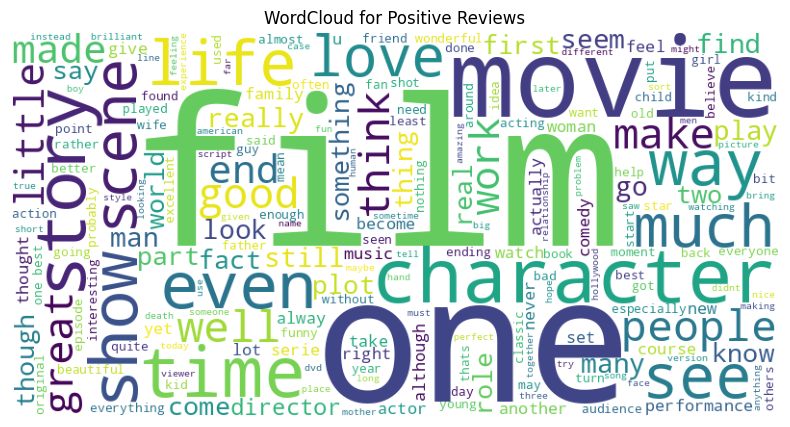

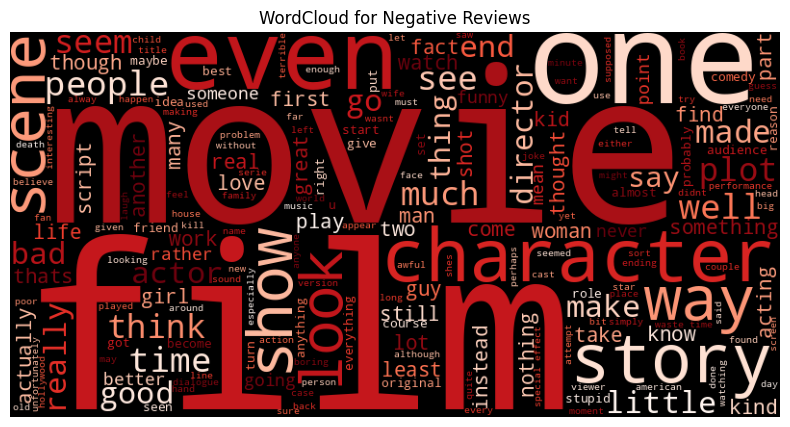

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_text = " ".join(data[data['sentiment']=='positive']['cleaned_review'])
negative_text = " ".join(data[data['sentiment']=='negative']['cleaned_review'])

# Wordcloud for positive reviews
plt.figure(figsize=(10,5))
plt.title("WordCloud for Positive Reviews")
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_text))
plt.axis("off")
plt.show()

# Wordcloud for negative reviews
plt.figure(figsize=(10,5))
plt.title("WordCloud for Negative Reviews")
plt.imshow(WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text))
plt.axis("off")
plt.show()


In [8]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import spacy
from spacy import displacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Pick a random cleaned review to analyze
sample_text = data['cleaned_review'][10]
print("Sample Review:\n", sample_text)

# Process the text
doc = nlp(sample_text)

# POS Tagging
print("\n--- POS Tagging ---")
for token in doc[:20]:  # show first 20 words for simplicity
    print(f"{token.text} --> {token.pos_}")

# Named Entity Recognition
print("\n--- Named Entities ---")
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_})")


Sample Review:
 phil alien one quirky film humour based around oddness everything rather actual punchlinesat first odd pretty funny movie progressed didnt find joke oddness funny anymoreits low budget film thats never problem pretty interesting character eventually lost interesti imagine film would appeal stoner currently partakingfor something similar better try brother another planet

--- POS Tagging ---
phil --> PROPN
alien --> PROPN
one --> NUM
quirky --> ADJ
film --> NOUN
humour --> NOUN
based --> VERB
around --> ADP
oddness --> ADJ
everything --> PRON
rather --> ADV
actual --> ADJ
punchlinesat --> NOUN
first --> ADJ
odd --> ADJ
pretty --> ADV
funny --> ADJ
movie --> NOUN
progressed --> VERB
did --> AUX

--- Named Entities ---
phil alien (PERSON)
one (CARDINAL)
first (ORDINAL)


In [10]:
# Visualize POS and NER
displacy.render(doc, style='ent', jupyter=True)


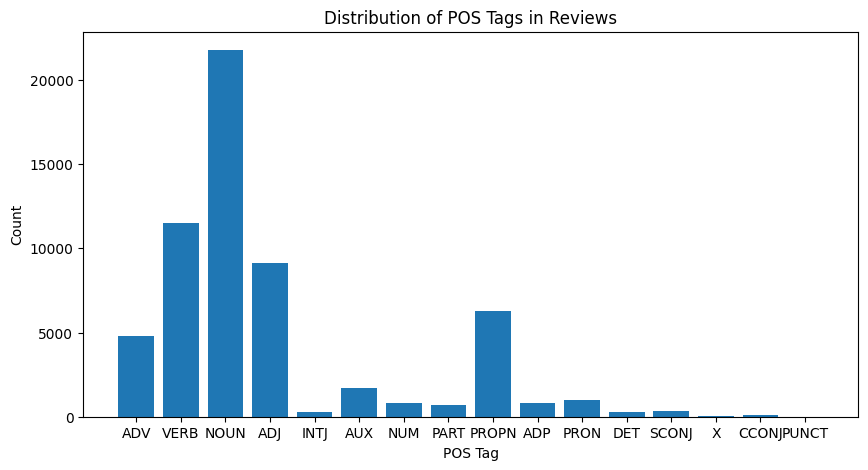

In [11]:
from collections import Counter
import matplotlib.pyplot as plt

# Get POS tags for all reviews
def get_pos_tags(text):
    doc = nlp(text)
    return [token.pos_ for token in doc]

# Apply POS tagging to a sample of reviews (to save time)
sample_data = data['cleaned_review'].sample(500, random_state=42)
all_pos = []

for review in sample_data:
    all_pos.extend(get_pos_tags(review))

# Count POS frequency
pos_counts = Counter(all_pos)

# Plot
plt.figure(figsize=(10,5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("Distribution of POS Tags in Reviews")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

# Features (text) and labels (sentiment)
X = data['cleaned_review']
y = data['sentiment']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (40000,)
Testing data size: (10000,)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit on training data and transform both train/test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)


TF-IDF shape: (40000, 5000)


In [14]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)


Model Accuracy: 0.8884

Classification Report:

              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



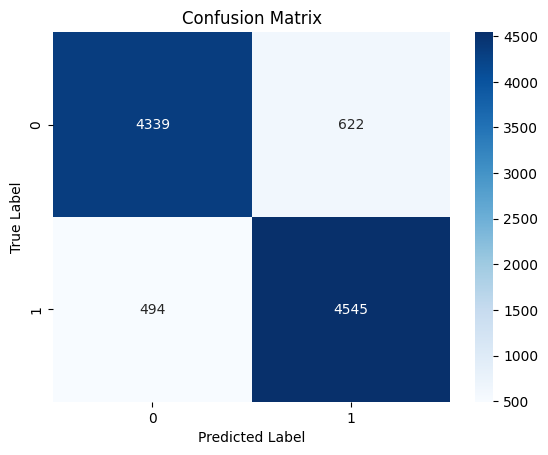

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [16]:
def predict_sentiment(text):
    cleaned_text = text.lower()
    vector = tfidf.transform([cleaned_text])
    prediction = model.predict(vector)[0]
    return prediction

# Try custom reviews
print(predict_sentiment("The movie was absolutely fantastic and emotional!"))
print(predict_sentiment("It was a boring movie with a weak story and bad acting."))


positive
negative


In [17]:
!pip install nrclex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=fbd6b7b6323eb335904028d8538c4482a7f7a1d224ea8e57ffefd04dc2da0276
  Stored in directory: /root/.cache/pip/wheels/1f/e8/d0/e3c3da0ef3b37ef4381dbf5c9401f3a9861a63ce221b13d8bb
Successfully built nrclex


In [18]:
# 1) Install libraries (if not installed)
!pip install nrclex textblob -q

# 2) Download TextBlob corpora (this downloads several needed resources)
!python -m textblob.download_corpora -q

# 3) Also ensure NLTK basics are present
import nltk
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("Required corpora installed ✅")

# 4) Now do a robust emotion extraction example using NRCLex
from nrclex import NRCLex
from tqdm import tqdm
import pandas as pd

# Use a small sample to test (you can increase later)
sample_reviews = data.sample(500, random_state=42).copy()

def extract_dominant_emotion(text):
    try:
        emo = NRCLex(text)
        scores = emo.raw_emotion_scores  # dict like {'joy':3, 'sadness':1}
        if not scores:
            return 'neutral'
        # pick emotion with highest count; if tie, choose one deterministically
        dominant = max(scores.items(), key=lambda x: (x[1], x[0]))[0]
        return dominant
    except Exception as e:
        # if something goes wrong, return neutral (safe fallback)
        return 'neutral'

# Run extraction with progress bar
emotion_list = []
for review in tqdm(sample_reviews['cleaned_review'], desc="Extracting emotions"):
    emotion_list.append(extract_dominant_emotion(review))

sample_reviews['emotion'] = emotion_list
print(sample_reviews['emotion'].value_counts())


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
Required corpora installed ✅


Extracting emotions: 100%|██████████| 500/500 [00:01<00:00, 381.24it/s]

emotion
positive        331
negative        116
trust            34
anticipation     11
sadness           6
fear              2
Name: count, dtype: int64


/tmp/ipython-input-1160054801.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=sample_reviews, palette='coolwarm', order=sample_reviews['emotion'].value_counts().index)


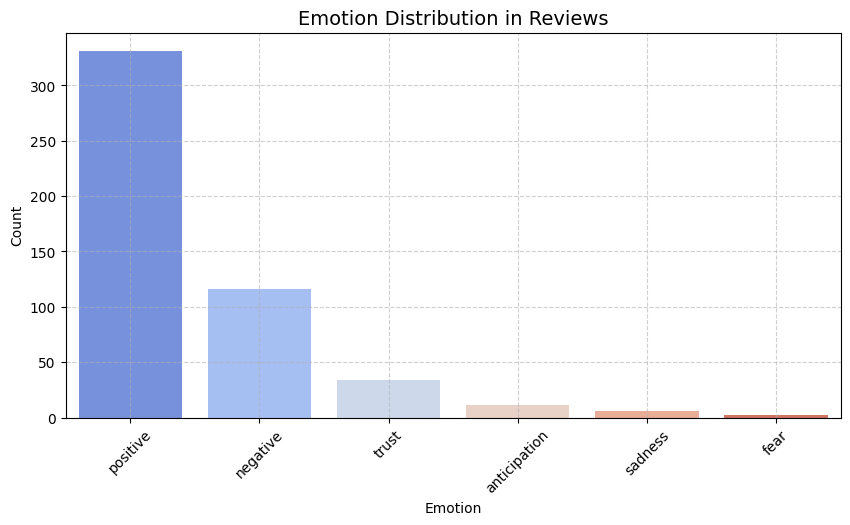

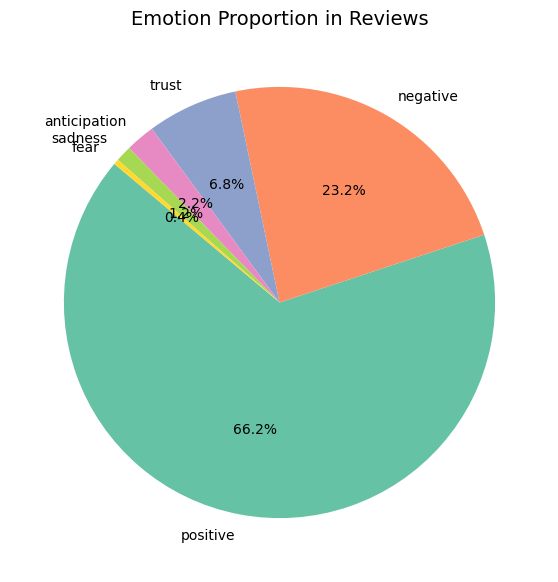

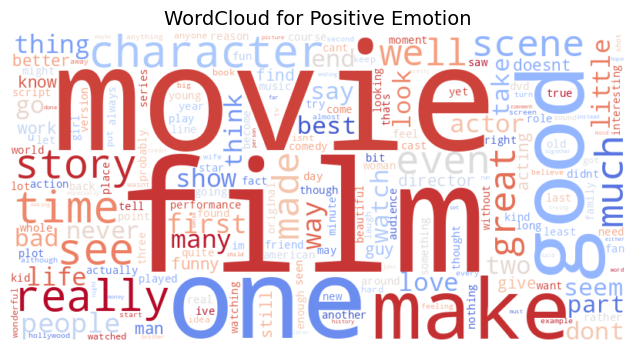

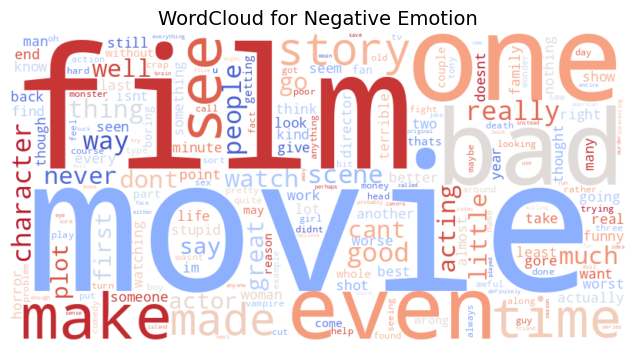

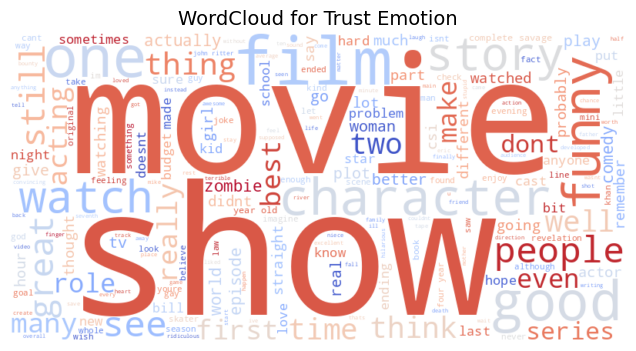

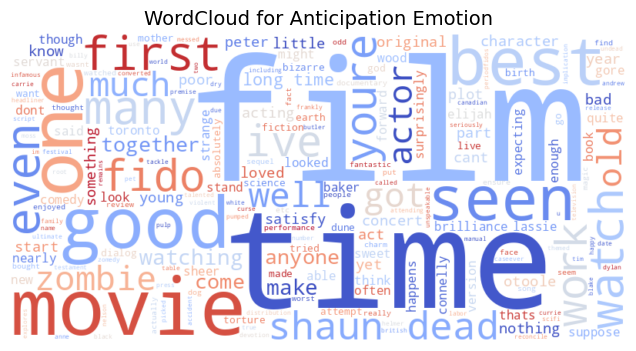

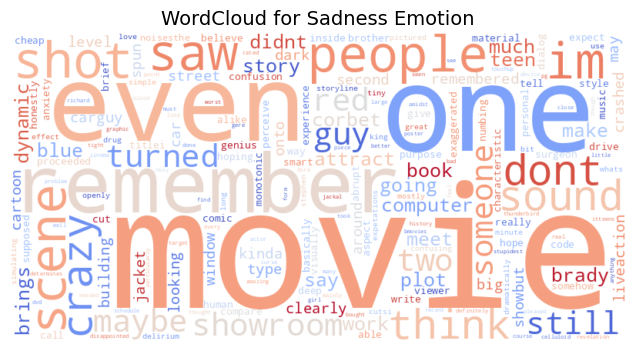

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Emotion distribution bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='emotion', data=sample_reviews, palette='coolwarm', order=sample_reviews['emotion'].value_counts().index)
plt.title("Emotion Distribution in Reviews", fontsize=14)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Pie chart for emotion percentage
emotion_counts = sample_reviews['emotion'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("Emotion Proportion in Reviews", fontsize=14)
plt.show()

# WordCloud for each major emotion
for emotion in sample_reviews['emotion'].value_counts().index[:5]:
    text = " ".join(sample_reviews[sample_reviews['emotion'] == emotion]['cleaned_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {emotion.capitalize()} Emotion", fontsize=14)
    plt.show()
